In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import xgboost
import os

path_raw = "F:/Masters/Data_Science/Code_C1/Data/" 
path_processed = "F:/Masters/Data_Science/Code_C1/Processed_Data/" 
folder_path = "F:/Masters/Data_Science/Code_C1/"

## Data Combination

In [2]:
# Dropping Extra Columns, Null Values and Extra Rows at the Beginning

comb_file = pd.DataFrame()
for file in os.listdir(path_raw):
    
    print(file)
    data = pd.read_csv(path_raw+file,low_memory=False)
    data = data.iloc[2:,1:]
    data = data.loc[data["Eye movement type"]=="Fixation"]
    if ("Mouse position X" in data.columns) & ("Mouse position Y" in data.columns):
        data = data.drop(["Mouse position X","Mouse position Y"],axis=1)
    data = data.drop(["Event","Event value",
                      "Recording timestamp","Computer timestamp","Sensor","Export date",
                      "Recording date","Recording date UTC","Recording start time","Recording start time UTC",
                      "Recording duration","Timeline name","Recording Fixation filter name","Recording software version",
                      "Recording resolution height","Recording resolution width","Recording monitor latency","Eyetracker timestamp",
                      "Presented Media position X (DACSpx)","Presented Media position Y (DACSpx)","Eye movement type"],axis=1)
    data["Pupil diameter left"] = data["Pupil diameter left"].ffill()
    data["Pupil diameter right"] = data["Pupil diameter right"].ffill()
    data = data.dropna()
    data = data.reset_index(drop=True)
    if data["Participant name"].iloc[0][-2] == "0":
        data["Participant name"] = int(data["Participant name"].iloc[0][-1])
    else:
        data["Participant name"] = int(data["Participant name"].iloc[0][-2]+data["Participant name"].iloc[0][-1])
    comb_file = pd.concat([comb_file,data])

comb_file = comb_file.reset_index(drop=True)  
comb_file.to_feather(path_processed+"combined_data.feather")

EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_0.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_10.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_11.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_12.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_13.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_14.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_15.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_16.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_17.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_18.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_19.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_2.csv
EyeT_group_dataset_III_image_name_letter_

EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_0.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_2.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_3.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_4.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_5.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_6.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_7.csv
EyeT_group_dataset_III_image_name_letter_card_participant_29_trial_0.csv
EyeT_group_dataset_III_image_name_letter_card_participant_29_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_29_trial_2.csv
EyeT_group_dataset_III_image_name_letter_card_participant_29_trial_3.csv
EyeT_group_dataset_III_image_name_letter_card_participant_29_trial_4.csv
EyeT_group_dataset_III_image_name_letter_card_parti

EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_2.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_3.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_4.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_5.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_6.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_7.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_0.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_2.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_3.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_4.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_5.csv
EyeT_group_dataset_III_image_name_letter_card_parti

EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_25.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_26.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_27.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_28.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_29.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_3.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_30.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_31.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_32.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_33.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_34.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_35.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_36.csv
EyeT_group_dataset_III_image_name_letter_card_partic

EyeT_group_dataset_II_image_name_grey_orange_participant_16_trial_3.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_20_trial_0.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_20_trial_1.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_20_trial_2.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_20_trial_3.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_22_trial_0.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_22_trial_1.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_22_trial_2.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_22_trial_3.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_24_trial_1.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_24_trial_2.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_26_trial_2.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_28_trial_0.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_28_tria

## Data Merging

In [3]:
# Merging with Questionaire Data

qA = pd.read_csv(folder_path+"Questionnaire_datasetIA.csv",encoding='latin-1')
qB = pd.read_csv(folder_path+"Questionnaire_datasetIB.csv",encoding='latin-1')

qA = qA[["Participant nr","Total Score extended","Total Score original"]].rename(columns={"Participant nr":"Participant name"})
qB = qB[["Participant nr","Total Score extended","Total Score original"]].rename(columns={"Participant nr":"Participant name"})

before_stimuli = comb_file.merge(qA,how="left",on=["Participant name"])
after_stimuli = comb_file.merge(qA,how="left",on=["Participant name"])

before_stimuli.to_feather(path_processed+"combined_data_before.feather")
after_stimuli.to_feather(path_processed+"combined_data_after.feather")

## Data Analysis

**No of Recordings per Participant**

In [4]:
new_df1 = pd.DataFrame()
new_df2 = pd.DataFrame()

for part in list(after_stimuli["Participant name"].unique()):
    temp = after_stimuli.loc[after_stimuli["Participant name"]==part]
    temp = temp.reset_index(drop=True)
    
    temp2 = before_stimuli.loc[before_stimuli["Participant name"]==part]
    temp2 = temp2.reset_index(drop=True)
    
    if temp["Recording name"].nunique() == 4:
        temp["Project name"] = "Control group experiment"
        temp2["Project name"] = "Control group experiment"
    else:
        temp["Project name"] = "Test group experiment"
        temp2["Project name"] = "Test group experiment"
        
    new_df1 = pd.concat([new_df1,temp])
    new_df2 = pd.concat([new_df2,temp2])

new_df1 = new_df1.reset_index(drop=True)
new_df2 = new_df2.reset_index(drop=True)

In [5]:
after_stimuli = new_df1.copy()
before_stimuli = new_df2.copy()

In [6]:
recordings_per_pn = after_stimuli.groupby(by=["Project name","Participant name"],as_index=False)["Recording name"].nunique()
recordings_per_pn = recordings_per_pn.rename(columns={"Recording name":"No_of_Rec"})

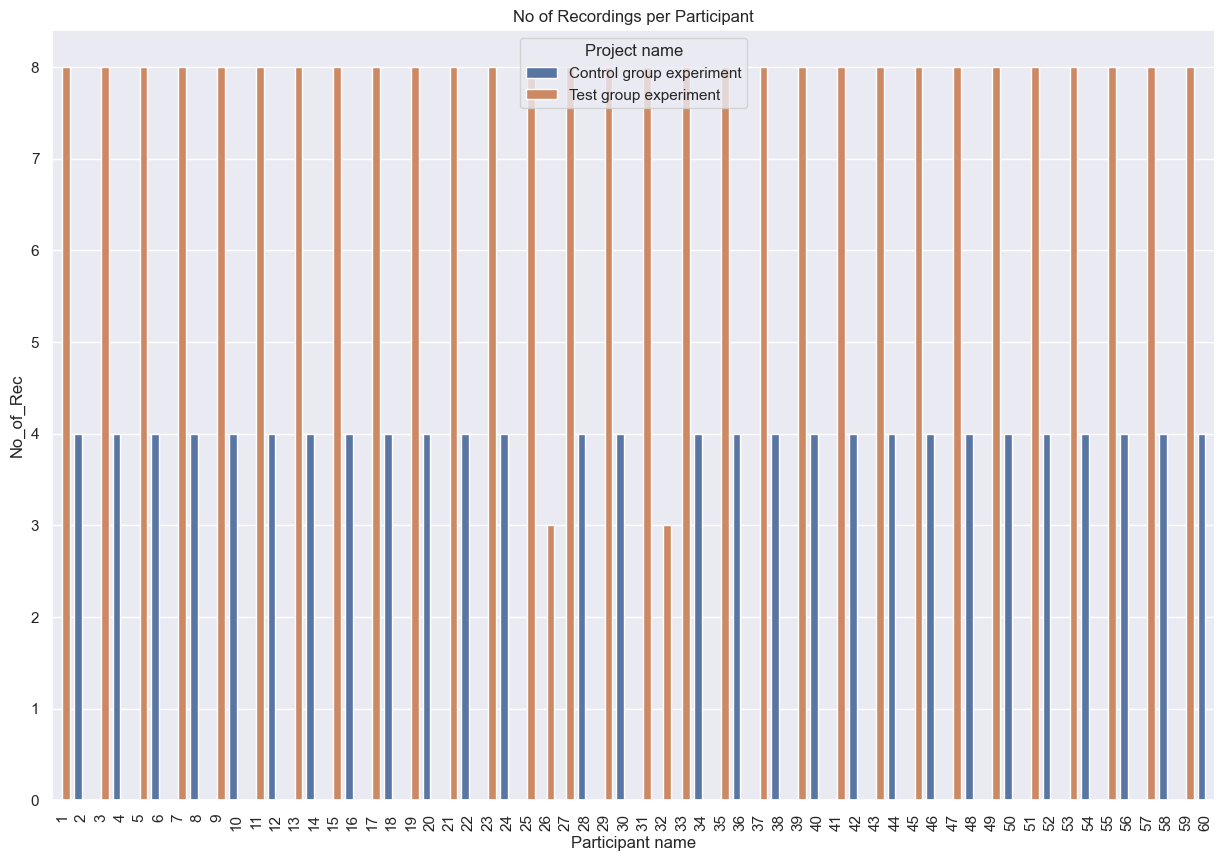

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
a = sns.barplot(x="Participant name",y="No_of_Rec",hue='Project name',data=recordings_per_pn)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.title("No of Recordings per Participant")
plt.show()

**Changes in Score Before and After the Stimuli**
1. Changes in Score before and After the Experiment

In [8]:
score_changes_after = after_stimuli.groupby(by=["Participant name"],as_index=False)["Total Score original"].mean().rename(columns={"Total Score original":"Score_After"})
score_changes_before = before_stimuli.groupby(by=["Participant name"],as_index=False)["Total Score original"].mean().rename(columns={"Total Score original":"Score_Before"})

In [9]:
score_changes = score_changes_after.copy()
score_changes = score_changes.merge(score_changes_before,how="left",on=["Participant name"])
score_changes = score_changes["Score_After"] - score_changes["Score_Before"]

In [10]:
score_changes

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
59    0.0
dtype: float64

**Score per Particpiant**

In [11]:
score_changes_after = after_stimuli.groupby(by=["Participant name","Project name"],as_index=False)["Total Score original"].mean()

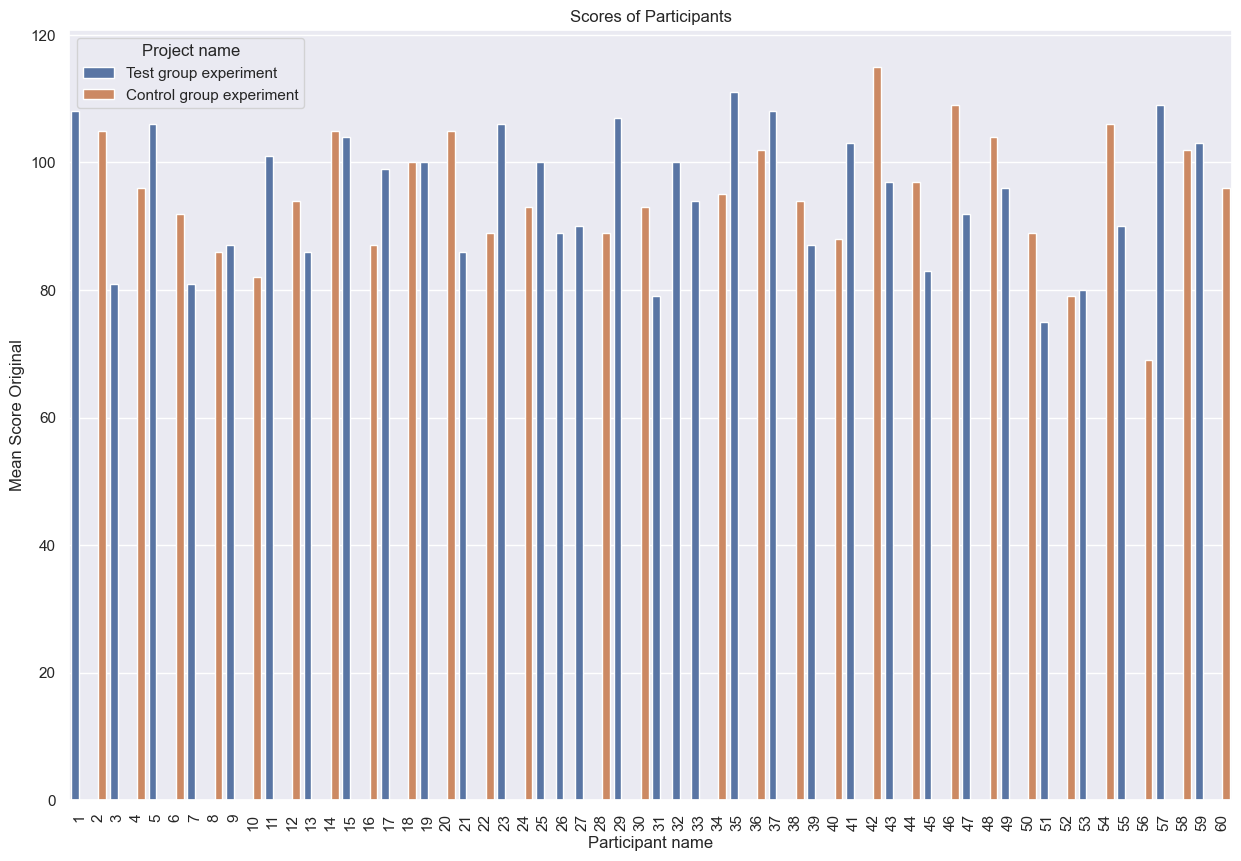

In [12]:
sns.set(rc={'figure.figsize':(15,10)})
a = sns.barplot(x="Participant name",y="Total Score original",hue='Project name',data=score_changes_after)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.ylabel("Mean Score Original")
plt.title("Scores of Participants")
plt.show()

## AI Modelling

In [13]:
# Selecting the Columns

columns_to_keep = ["Participant name","Recording name","Gaze point X","Gaze point Y","Pupil diameter left","Pupil diameter right",
                   "Presented Media width","Presented Media height","Gaze event duration","Eye movement type index",
                   "Fixation point X","Fixation point Y","Total Score original"]
data_for_modelling = after_stimuli[columns_to_keep]
data_for_modelling = data_for_modelling.reset_index(drop=True)
data_for_modelling = data_for_modelling.rename(columns={"Total Score original":"Empathy_Score"})

In [14]:
# Converting Pupil Diameter from Object to Float

data_for_modelling["Pupil diameter left"] = data_for_modelling["Pupil diameter left"].str.replace(",",".").astype("float64")
data_for_modelling["Pupil diameter right"] = data_for_modelling["Pupil diameter right"].str.replace(",",".").astype("float64")

In [15]:
# Define the list of columns for which to calculate statistics

cols = ["Gaze point X", "Gaze point Y", "Pupil diameter left", "Pupil diameter right", "Presented Media width", 
        "Presented Media height", "Gaze event duration", "Eye movement type index", "Fixation point X", "Fixation point Y"]

# Group the data by participant ID and recording name and calculate the statistics for each column using pandas' 
# built-in functions
stats_df = data_for_modelling.groupby(["Participant name", "Recording name"])[cols].agg(['median', 'mean', 'std'])

# Flatten the multi-level column names and reset the index
stats_df.columns = [f"{col}_{stat}" for col, stat in stats_df.columns]
stats_df = stats_df.reset_index()

# Merge the statistics dataframe back into the original dataframe and drop the unnecessary columns
data_for_modelling = data_for_modelling.merge(stats_df, on=["Participant name", "Recording name"])
data_for_modelling = data_for_modelling.drop_duplicates(subset=["Participant name","Recording name"])
data_for_modelling = data_for_modelling.drop(["Participant name","Recording name"],axis=1)
data_for_modelling = data_for_modelling.reset_index(drop=True)
data_for_modelling = data_for_modelling.drop(cols, axis=1)

In [16]:
data_for_modelling

,Empathy_Score,Gaze point X_median,Gaze point X_mean,Gaze point X_std,Gaze point Y_median,Gaze point Y_mean,Gaze point Y_std,Pupil diameter left_median,Pupil diameter left_mean,Pupil diameter left_std,...,Gaze event duration_std,Eye movement type index_median,Eye movement type index_mean,Eye movement type index_std,Fixation point X_median,Fixation point X_mean,Fixation point X_std,Fixation point Y_median,Fixation point Y_mean,Fixation point Y_std
0,108,998.0,1037.392070,259.293057,347.0,397.955507,208.910349,3.10,3.090868,0.151629,...,99.106862,164.0,163.607489,52.392995,1001.0,1037.340969,258.853556,343.0,397.771806,208.815522
1,108,963.0,977.585095,308.367768,387.0,432.522393,207.057554,3.03,3.027886,0.111750,...,89.138607,151.0,151.819061,60.414382,963.0,977.623791,308.101423,381.0,432.685417,206.707494
2,108,959.0,956.542629,256.413760,561.0,492.889641,225.229262,3.12,3.111275,0.105634,...,110.260267,131.0,131.318327,60.368457,960.5,956.671315,255.821381,561.5,492.894821,224.805964
3,108,958.0,950.418668,204.308188,517.0,485.595275,229.306415,3.05,3.055250,0.111735,...,100.099174,210.0,206.576491,101.805787,958.0,950.353989,204.062655,527.0,485.796863,228.973738
4,108,984.0,983.003288,263.758793,569.0,498.879645,219.195304,3.05,3.046672,0.139063,...,104.939601,121.0,130.579415,66.874928,982.0,982.835252,263.589598,574.0,499.083196,218.741731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,105,760.0,849.258421,325.827462,288.0,391.615406,262.450895,3.13,3.134575,0.340471,...,388.512577,86.0,86.447267,43.813000,759.0,849.223909,325.734887,296.0,391.523468,262.348388
354,89,894.0,883.319780,198.066511,532.0,549.150275,226.747560,3.37,3.337442,0.219072,...,287.288297,80.0,83.234341,41.684420,894.0,883.291209,197.485401,531.0,549.202198,226.695235
355,89,829.0,841.006814,216.263246,471.0,515.237933,237.645908,3.60,3.532365,0.366183,...,112.537972,106.0,106.950596,55.738581,826.0,840.891823,215.661763,474.0,515.303521,237.543619
356,89,798.0,847.966987,255.159118,439.0,478.450288,213.584519,3.57,3.496660,0.347554,...,102.725539,72.0,75.547025,41.497874,798.0,848.325144,254.742959,440.0,478.726679,213.540955


In [218]:
data_for_modelling['Empathy_Score_Bin'] = pd.qcut(data_for_modelling["Empathy_Score"],3,labels=list('012'))
data_for_modelling['Empathy_Score_Bin'] = data_for_modelling['Empathy_Score_Bin'].astype('int64')

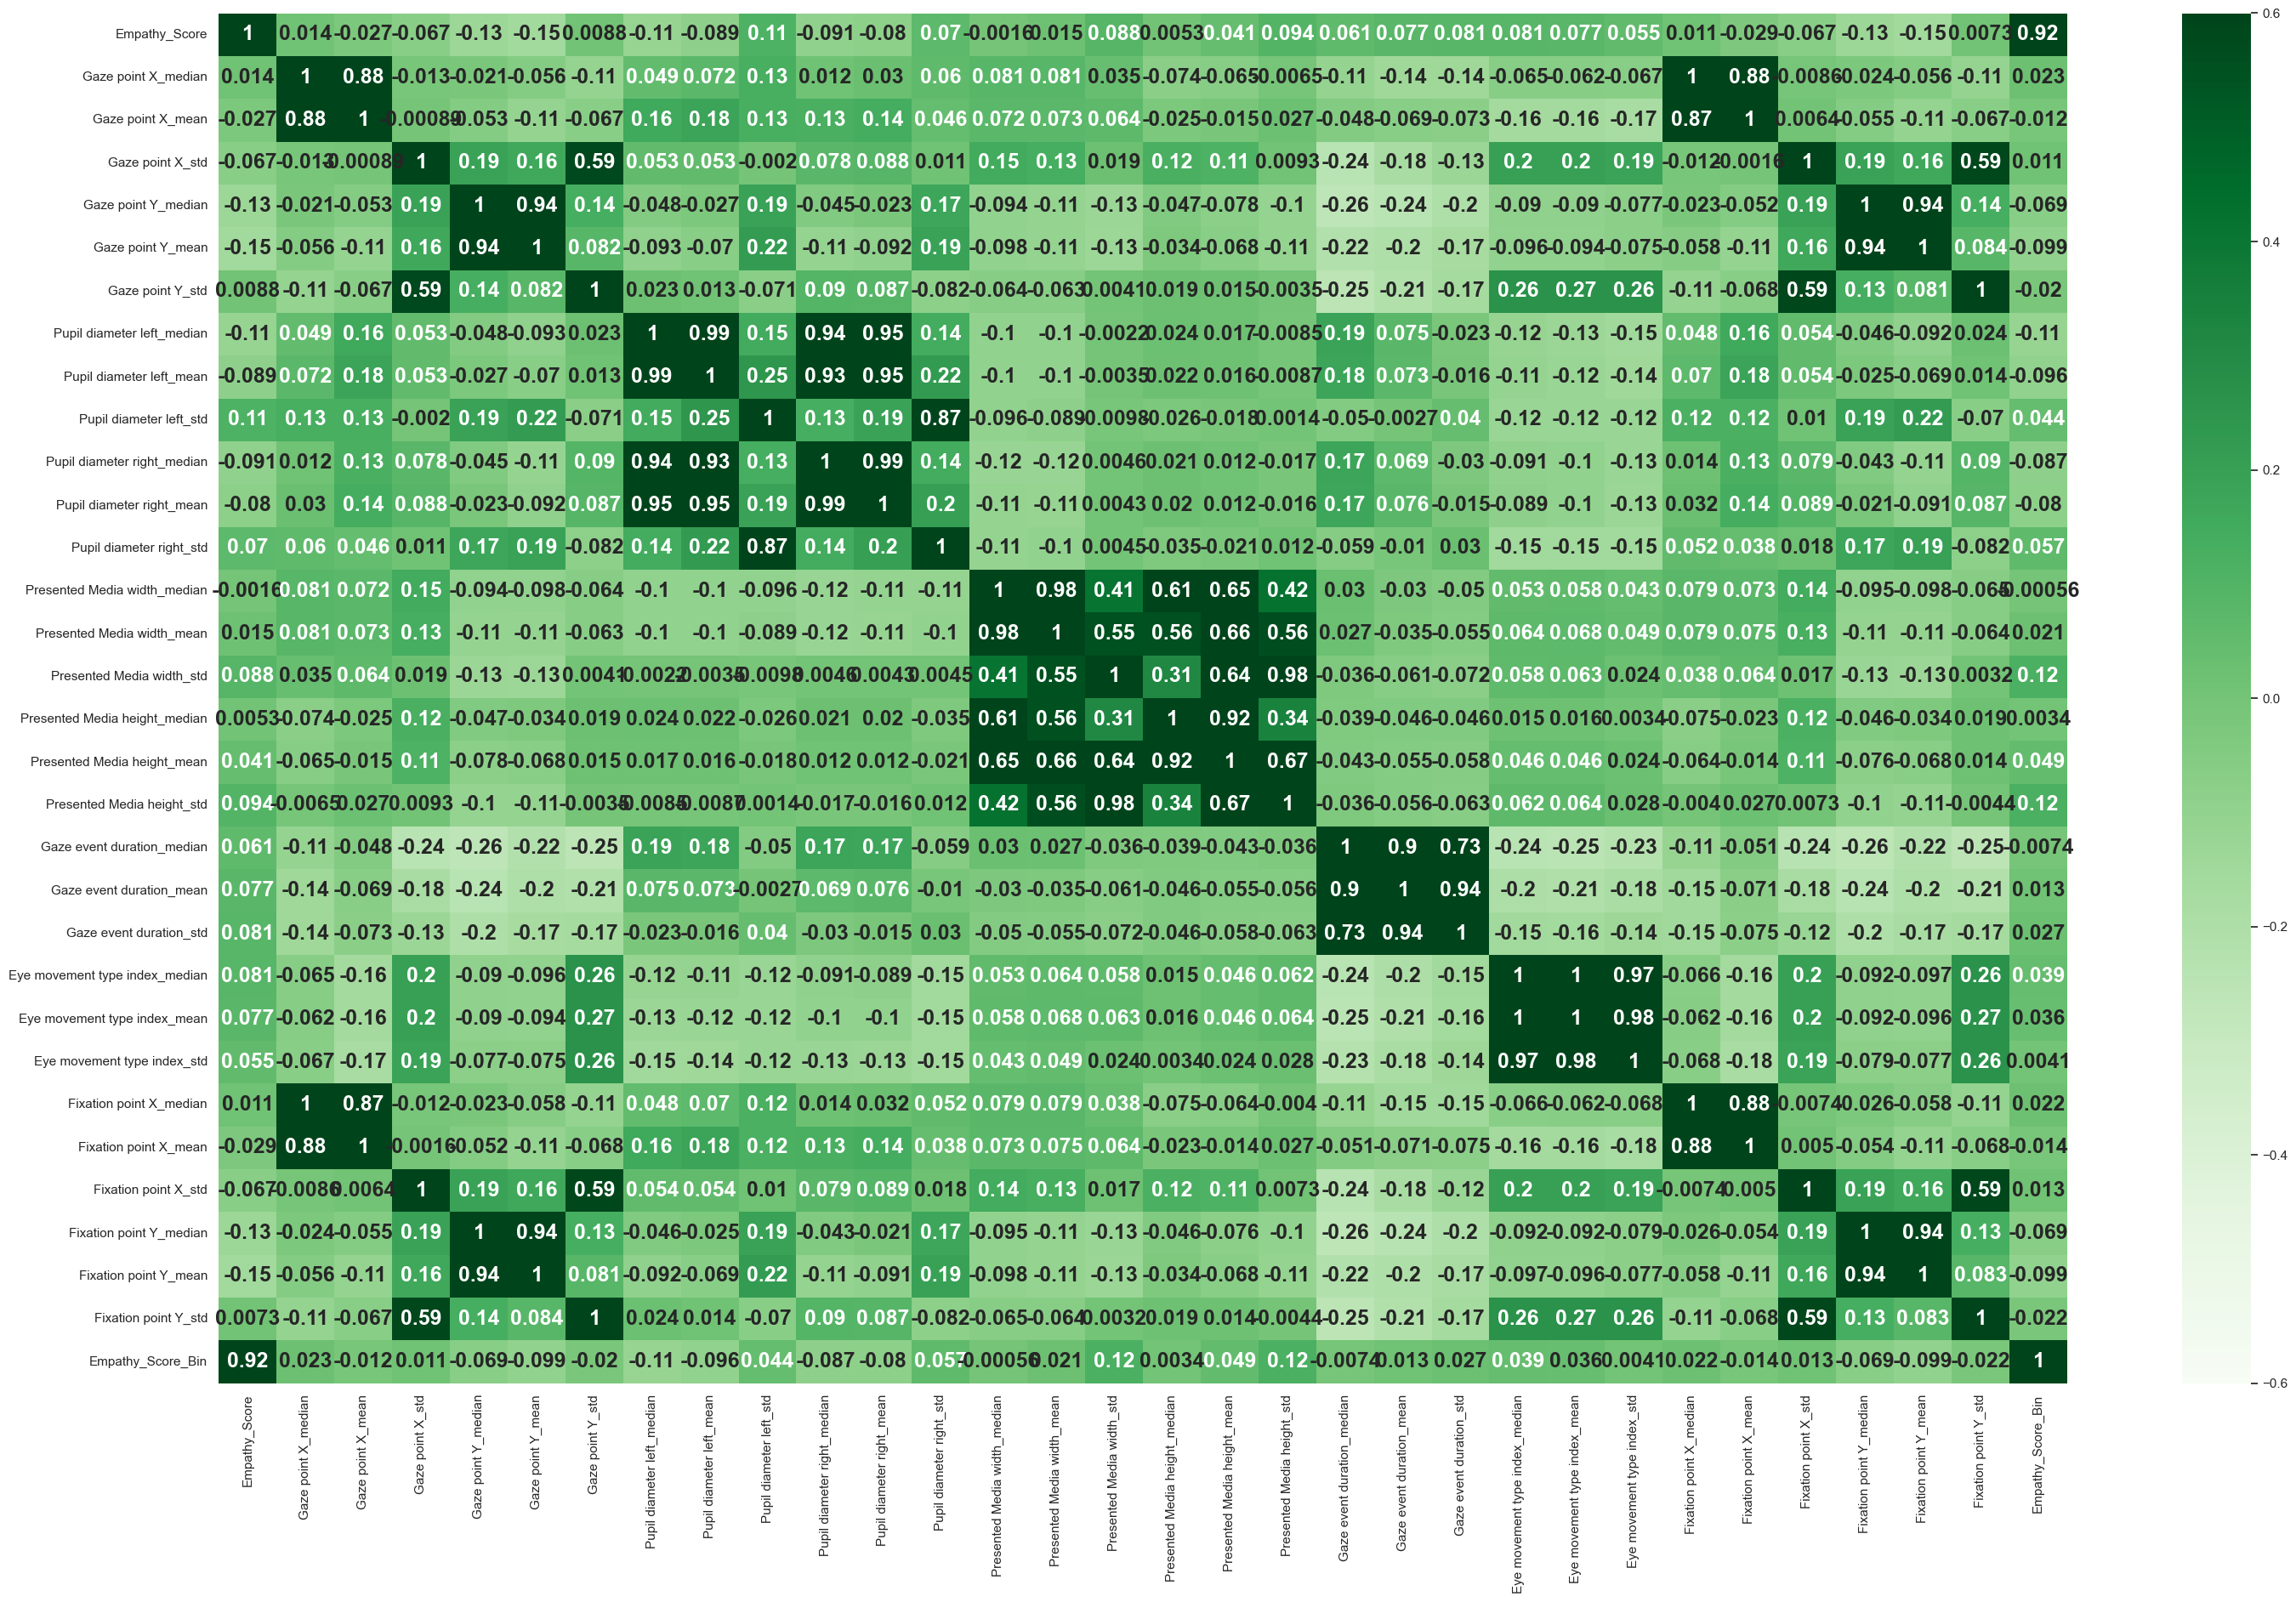

In [219]:
# Plotting the Correlation Matrix

plt.figure(figsize=(30,19))
sns.heatmap(data_for_modelling.corr(),annot=True,linewidths=0,vmin=-0.60,vmax=0.60,cmap="Greens",annot_kws={"size":18,"weight":"bold"})
plt.tight_layout()
plt.show()

In [220]:
# Splitting the Data in 80-20 split

train_X,test_X,train_Y,test_Y = train_test_split(data_for_modelling.drop(["Empathy_Score","Empathy_Score_Bin"],axis=1),
                                                 data_for_modelling[["Empathy_Score_Bin"]],
                                                 stratify=data_for_modelling[["Empathy_Score_Bin"]],
                                                 test_size=0.20)
train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
train_Y = train_Y.reset_index(drop=True)
test_Y = test_Y.reset_index(drop=True)
print(train_X.shape)
print(test_X.shape)

(286, 30)
(72, 30)


### Xtreme Gradient Boosting (XGB) Classifier
XGBoost, short for Extreme Gradient Boosting, is a popular and powerful machine learning algorithm for supervised learning problems, particularly for regression and classification tasks. It is based on the gradient boosting framework, which sequentially adds new models to an ensemble of weak models, with each new model correcting the errors of the previous ones.

In [221]:
xgb = xgboost.XGBClassifier(random_state=0)

In [222]:
# Initial Cross Validation and Testing Scores

initial_c_score = cross_val_score(xgb,train_X.values,train_Y.values.ravel(),cv=10,scoring="balanced_accuracy",n_jobs=-1)
initial_c_score = np.mean(initial_c_score)

xgb.fit(train_X.values,train_Y.values.ravel())
pred_Y = xgb.predict(test_X)
initial_t_score = balanced_accuracy_score(pred_Y,test_Y)

print(initial_c_score)
print("Test Accuracy = ",initial_t_score)

0.6489646464646464
Test Accuracy =  0.712237583205325


In [223]:
# Using Cross Validation with Recursive Feature Elimination to identify the Best Features

feat_sel = RFECV(estimator=xgb,step=1,cv=10)
feat_sel.fit(train_X,train_Y.values.ravel())
print(feat_sel.n_features_)

train_X_best = train_X[[feat_sel.feature_names_in_[idx] for idx,x in enumerate(feat_sel.ranking_) if x ==1]]
test_X_best = test_X[[feat_sel.feature_names_in_[idx] for idx,x in enumerate(feat_sel.ranking_) if x ==1]]

xgb.fit(train_X_best,train_Y.values.ravel())
pred_Y = xgb.predict(test_X_best)
print("Test Accuracy after Feature Selection = ",balanced_accuracy_score(pred_Y,test_Y))

16
Test Accuracy after Feature Selection =  0.6411965811965812


In [224]:
# Optimizing the Hyper Parameters

random = RandomizedSearchCV(xgb,dict(n_estimators=[100,250,500,750,1000],max_leaves=[21,31,41],
                                     learning_rate=[0.001,0.01,0.1]),
                            cv=10,scoring="balanced_accuracy",
                            n_jobs=-1)
opt_model = random.fit(train_X_best.values,train_Y.values.ravel())

xgb = xgboost.XGBClassifier(**opt_model.best_estimator_.get_params())
xgb.fit(train_X_best.values,train_Y.values.ravel())
pred_Y = xgb.predict(test_X_best)
print("Test Accuracy after Optimizing the Parameters is = ",balanced_accuracy_score(pred_Y,test_Y))

Test Accuracy after Optimizing the Parameters is =  0.6610936172339681


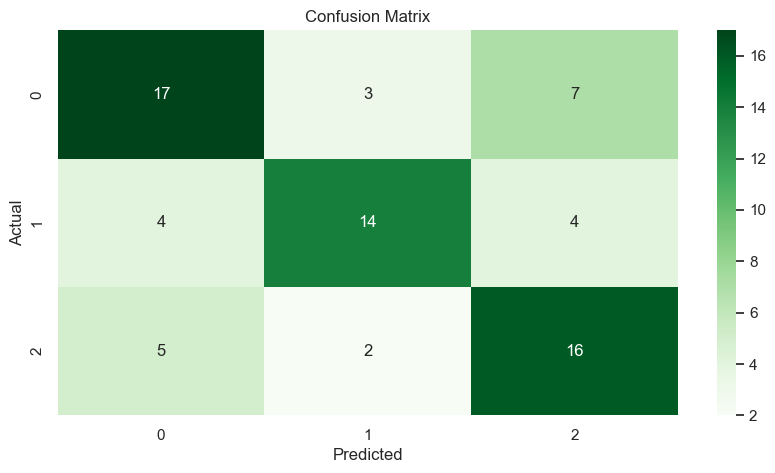

In [225]:
# Results in the form of a Confusion Matrix

matrix = confusion_matrix(test_Y,pred_Y,labels=[0,1,2])   
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True,xticklabels=[0,1,2],yticklabels=[0,1,2], cmap="Greens", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()

## Conclusion
After observation we found that some of the summary features seemed less important and didnt have much effect on the Empathy levels. We were successfullt able to identify the correct empathy level of the participants using the data from eyetacker such as pupil size and gaze